<a href="https://colab.research.google.com/github/prmanish/digital-addressee-system/blob/master/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn as sk


In [2]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


In [0]:
import io


In [7]:
df=pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
#no of fraud and non fraud points
frauds=df.loc[df['Class']==1]
non_frauds=df.loc[df['Class']==0]
print(len(frauds),len(non_frauds))

492 284315


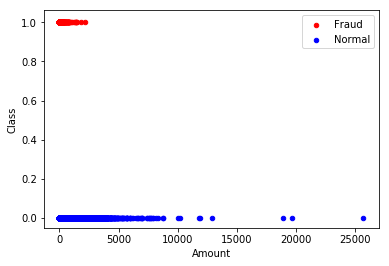

In [15]:
#graph plotting with scatter-plot
import matplotlib.pyplot as plt
axis=frauds.plot.scatter(x='Amount', y='Class', color='Red', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=axis)
plt.show()


In [0]:
from sklearn.preprocessing import scale
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df['Class']

data = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(data)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size = 0.33, random_state=42)



In [26]:
from sklearn import linear_model
loreg=linear_model.LogisticRegression()
loreg.fit(X_train, y_train)
print(loreg.score(X_test, y_test))


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9984146743698596


     |████████████████████████████████| 102kB 4.0MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


Confusion matrix:
Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


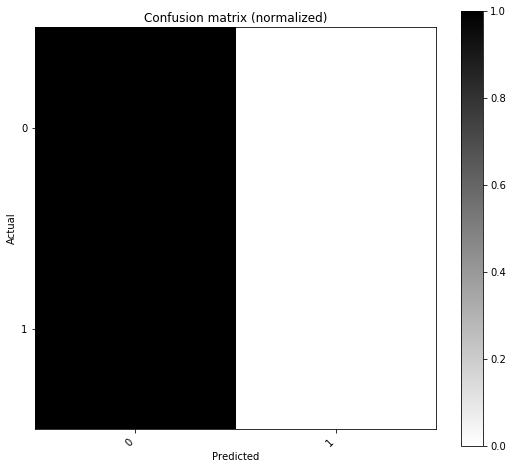

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:60: RuntimeWarning: overflow encountered in long_scalars
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/stats.py:61: RuntimeWarning: overflow encountered in long_scalars
  den = (np.float64(nis2 + njs2) / 2 - np.float64(nis2 * njs2) / n2)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:259: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TN) / self.NegativeTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml

Confusion Matrix:

Predicted      0  1  __all__
Actual                      
0          93838  0    93838
1            149  0      149
__all__    93987  0    93987


Overall Statistics:

Accuracy: 0.9984146743698596
95% CI: (0.9981389650810484, 0.9986588455019066)
No Information Rate: ToDo
P-Value [Acc > NIR]: 1.0
Kappa: 0.0
Mcnemar's Test P-Value: ToDo


Class Statistics:

Classes                                         0           1
Population                                  93987       93987
P: Condition positive                       93838         149
N: Condition negative                         149       93838
Test outcome positive                       93987           0
Test outcome negative                           0       93987
TP: True Positive                           93838           0
TN: True Negative                               0       93838
FP: False Positive                            149           0
FN: False Negative                              0         149
TPR

/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:236: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:267: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.FP) / self.PositiveTest)
/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:330: RuntimeWarning: invalid value encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


In [29]:
#confusion matrix building
!pip install pandas_ml
y_predicted = np.array(loreg.predict(X_test))
y_right = np.array(y_test)
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [0]:
#Oversampling the data
import pandas_ml as pdml
df2= pdml.ModelFrame(X, target=y)
sampler = df2.imbalance.over_sampling.SMOTE()
sampled = df2.fit_sample(sampler)

In [34]:
#re-training and testing the accuracy after oversampling
from sklearn.preprocessing import scale

X1 = sampled.iloc[:,1:]
y1 = sampled['Class']

X1 = scale(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1.as_matrix(), test_size=0.35, random_state=250)
lr= linear_model.LogisticRegression()
lr.fit(X_train1, y_train1)
print("Percentage accuracy: ", lr.score(X_test1, y_test1)*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Percentage accuracy:  98.01628973826882


Confusion matrix:
Predicted   False   True  __all__
Actual                           
False       98804    814    99618
True         3134  96269    99403
__all__    101938  97083   199021


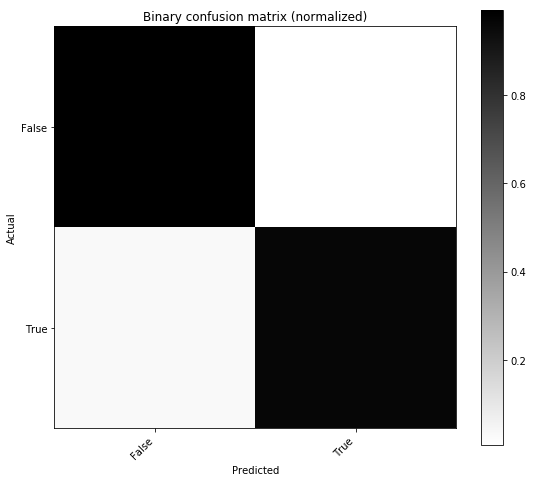

population: 199021
P: 99403
N: 99618
PositiveTest: 97083
NegativeTest: 101938
TP: 96269
TN: 98804
FP: 814
FN: 3134
TPR: 0.9684717765057392
TNR: 0.9918287859623762
PPV: 0.9916154218555256
NPV: 0.9692558221664149
FPR: 0.008171214037623723
FDR: 0.008384578144474316
FNR: 0.03152822349426074
ACC: 0.9801628973826882
F1_score: 0.9799069653817575
MCC: 3.9607471820337925
informedness: 0.9603005624681153
markedness: 0.9608712440219405
prevalence: 0.499459855995096
LRP: 118.52238505153406
LRN: 0.03178796979931244
DOR: 3728.529560075826
FOR: 0.030744177833585122


/usr/local/lib/python3.6/dist-packages/pandas_ml/confusion_matrix/bcm.py:302: RuntimeWarning: overflow encountered in long_scalars
  * (self.TN + self.FP) * (self.TN + self.FN)))


In [35]:
#confusion matrix after oversampling
y_predicted1 = np.array(lr.predict(X_test1))
y_right1 = np.array(y_test1)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()